In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A digit data set
We return to the digits dataset [Link](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset)

This dataset contains 1797 data points. Each data point is a low resolution grayscale image of a digit. We plot the 32nd digit, which is a 5.

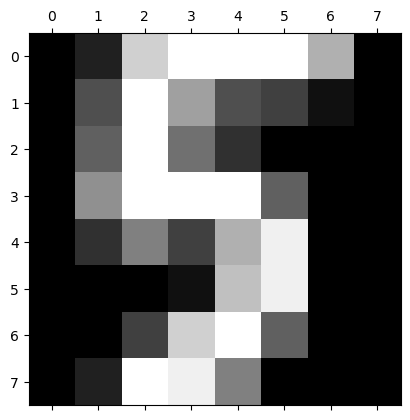

In [2]:
from sklearn.datasets import load_digits
digits=load_digits()

# Plotting the 32nd digit:
plt.matshow(digits.images[32], cmap='gray')

In [3]:
digits.target[32]

5

In [4]:
X=digits.data.T
C=digits.target
print(X.shape)

(64, 1797)


First, we centralize the data, so it has zero mean.

In [5]:
Xmean=np.mean(X,1) # taking the average over the data (1st index), not the pixels (0th index).

Xc=X-Xmean[:, None]


Now, we take the singular value decomposition of the centralized data matrix Xc. We use `full_matrices=False` to avoid computing a large $V$ that we do not actually need.

In [6]:
U,s,VT=np.linalg.svd(Xc, full_matrices=False)
print(U.shape)
print(s.shape)
print(VT.shape)

(64, 64)
(64,)
(64, 1797)


Then, we compute the three first coordinates of each image in the basis defined by the $\mathbf{u}$-vectors.

In [7]:
u1=U[:,0]
u2=U[:,1]
u3=U[:,2]

y1=u1@X
y2=u2@X
y3=u3@X

Now, we plot the data. First a 1D-projection. We use the coloring from the digits.

Text(0.5, 1.0, '1D-projection')

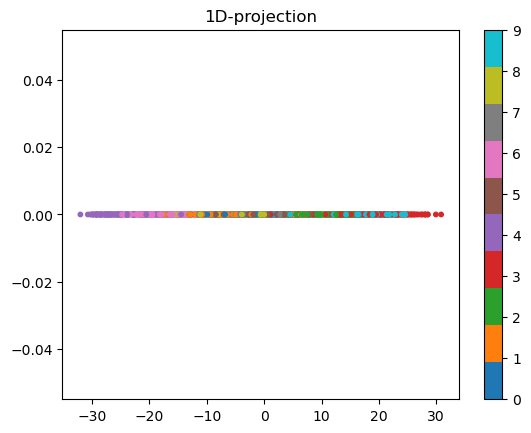

In [8]:
plt.figure()
plt.scatter(y1, np.zeros_like(y1), c=C, cmap='tab10', s=10)
plt.colorbar()
plt.title('1D-projection')

From the plot, we can see that 3 and 4 are the digits that as furthest apart.

Now, a 2D-projection:

Text(0.5, 1.0, '2D-projection')

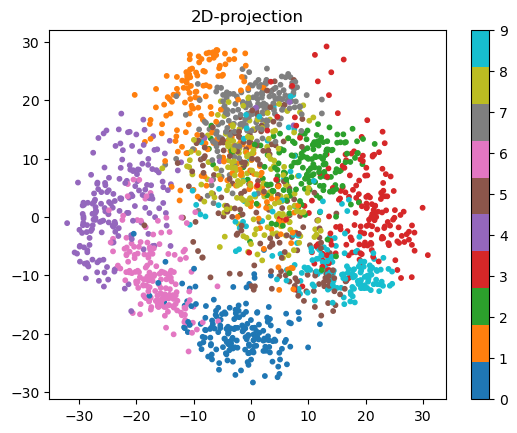

In [9]:
plt.figure()
plt.scatter(y1, y2, c=C, cmap='tab10', s=10)
plt.colorbar()
plt.title('2D-projection')

We already get some results. The digits become somewhat separate. 

Finally, we plot the 3 first principal components.

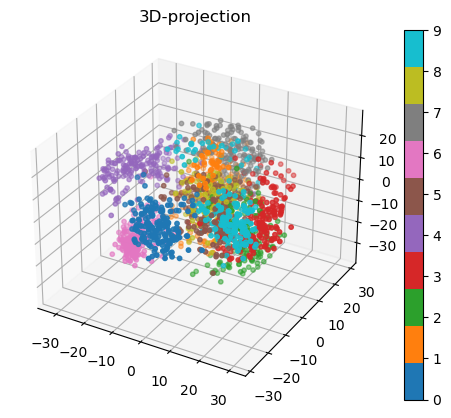

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot=ax.scatter(y1,y2, y3, c=C, cmap='tab10', s=10)
ax.set_title('3D-projection')
fig.colorbar(plot)


Let us also see the first principal vector as an image. Here we use yellow for positive and blue for negative values.

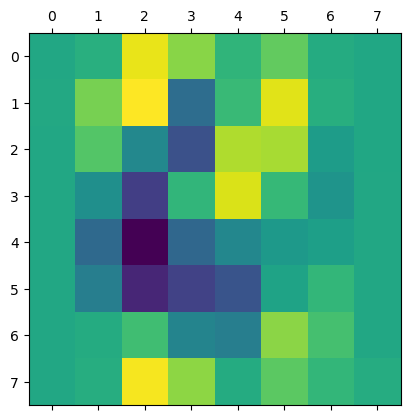

In [11]:
plt.matshow(u1.reshape((8,8)))

If we are generous, we might glimpse the image of a "3" minus the image of a "4", which is what we can also see in the plots: the 3 and 4 are clustered around the positive and negative x-axis, respectively.